### Explanation
- Data Loading- The seismic data is read as a string and then converted into a pandas DataFrame
- Analysis- The mean frequency is calculated for each row which gives and average amplitude across the frequency bins
- Visualisation- A plot is created to visualize the amplitude across frequency bins for each row

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

In [5]:
data_str= """L,N,freq01,freq02,freq03,freq04,freq05,freq06,freq07,freq08,freq09,freq10,freq11,freq12,freq13,freq14,freq15,freq16,freq17,freq18,freq19,freq20,freq21,freq22,freq23,freq24,freq25,freq26,freq27,freq28,freq29,freq30,freq31,freq32,freq33,freq34,freq35,freq36,freq37,freq38,freq39,freq40,
5,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.004,0.005,0.000,0.000,0.000,0.000,0.000,0.000,
5,2,0.000,0.000,0.000,0.000,0.000,0.013,0.021,0.026,0.033,0.041,0.052,0.065,0.158,0.259,0.288,0.324,0.366,0.391,0.383,0.348,0.314,0.283,0.274,0.274,0.253,0.281,0.324,0.397,0.450,0.635,0.821,1.035,1.108,1.156,0.707,0.243,0.083,0.055,0.033,0.021,
5,3,0.000,0.000,0.000,0.005,0.008,0.019,0.030,0.039,0.046,0.050,0.063,0.158,0.205,0.321,0.353,0.388,0.435,0.457,0.447,0.397,0.357,0.322,0.305,0.305,0.298,0.336,0.386,0.473,0.521,0.704,0.895,1.128,1.189,1.258,0.742,0.252,0.081,0.054,0.032,0.020,
5,4,0.000,0.007,0.008,0.020,0.032,0.029,0.042,0.058,0.061,0.073,0.164,0.186,0.222,0.316,0.350,0.404,0.448,0.481,0.469,0.419,0.378,0.336,0.302,0.293,0.272,0.276,0.297,0.355,0.398,0.571,0.785,0.982,1.001,1.004,0.600,0.202,0.072,0.047,0.026,0.015,
5,5,0.005,0.015,0.025,0.023,0.036,0.041,0.059,0.055,0.096,0.088,0.105,0.169,0.183,0.274,0.307,0.340,0.381,0.416,0.402,0.366,0.324,0.284,0.253,0.238,0.221,0.209,0.243,0.309,0.353,0.479,0.623,0.756,0.830,0.856,0.516,0.172,0.067,0.043,0.024,0.015,
5,6,0.004,0.007,0.017,0.020,0.042,0.054,0.048,0.069,0.096,0.088,0.097,0.094,0.158,0.248,0.284,0.319,0.359,0.388,0.376,0.340,0.295,0.260,0.236,0.227,0.214,0.227,0.252,0.297,0.329,0.485,0.612,0.804,0.868,0.892,0.521,0.165,0.065,0.042,0.023,0.015,
5,7,0.016,0.025,0.043,0.080,0.099,0.113,0.241,0.241,0.190,0.290,0.259,0.203,0.264,0.316,0.350,0.376,0.426,0.467,0.450,0.398,0.360,0.319,0.284,0.283,0.262,0.286,0.328,0.395,0.436,0.599,0.768,0.959,1.008,1.051,0.640,0.212,0.074,0.050,0.029,0.017,
5,8,0.033,0.044,0.064,0.065,0.167,0.172,0.193,0.310,0.259,0.274,0.269,0.176,0.259,0.312,0.341,0.379,0.431,0.462,0.436,0.391,0.348,0.312,0.279,0.284,0.260,0.265,0.302,0.372,0.404,0.573,0.769,0.975,1.015,1.058,0.643,0.224,0.075,0.050,0.028,0.017,
5,9,0.039,0.042,0.054,0.065,0.113,0.070,0.167,0.231,0.081,0.248,0.274,0.297,0.295,0.353,0.369,0.414,0.448,0.485,0.467,0.421,0.374,0.347,0.322,0.314,0.312,0.333,0.383,0.460,0.509,0.692,0.873,1.122,1.146,1.189,0.711,0.245,0.066,0.050,0.031,0.017,
5,10,0.044,0.049,0.110,0.240,0.209,0.196,0.236,0.260,0.231,0.454,0.542,0.341,0.428,0.369,0.410,0.431,0.462,0.490,0.469,0.440,0.388,0.347,0.319,0.310,0.297,0.302,0.341,0.414,0.457,0.635,0.804,1.032,1.082,1.134,0.693,0.234,0.075,0.048,0.027,0.021,
5,11,0.048,0.078,0.231,0.183,0.233,0.259,0.367,0.473,0.452,0.516,0.605,0.460,0.367,0.397,0.426,0.459,0.502,0.524,0.500,0.455,0.407,0.374,0.331,0.321,0.302,0.307,0.345,0.428,0.469,0.643,0.840,1.068,1.113,1.123,0.716,0.255,0.158,0.051,0.032,0.022,"""



In [7]:
#Load data into a Datafram
data=pd.read_csv(StringIO(data_str))
print(data)


    L   N  freq01  freq02  freq03  freq04  freq05  freq06  freq07  freq08  \
0   5   1   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
1   5   2   0.000   0.000   0.000   0.000   0.000   0.013   0.021   0.026   
2   5   3   0.000   0.000   0.000   0.005   0.008   0.019   0.030   0.039   
3   5   4   0.000   0.007   0.008   0.020   0.032   0.029   0.042   0.058   
4   5   5   0.005   0.015   0.025   0.023   0.036   0.041   0.059   0.055   
5   5   6   0.004   0.007   0.017   0.020   0.042   0.054   0.048   0.069   
6   5   7   0.016   0.025   0.043   0.080   0.099   0.113   0.241   0.241   
7   5   8   0.033   0.044   0.064   0.065   0.167   0.172   0.193   0.310   
8   5   9   0.039   0.042   0.054   0.065   0.113   0.070   0.167   0.231   
9   5  10   0.044   0.049   0.110   0.240   0.209   0.196   0.236   0.260   
10  5  11   0.048   0.078   0.231   0.183   0.233   0.259   0.367   0.473   

    ...  freq32  freq33  freq34  freq35  freq36  freq37  freq38  freq39  \


In [11]:
#Calculate the mean frequency for each row
data['mean_frequency']=data.loc[:,"freq01":"freq40"].mean(axis=1)
#print the mean frequencies
print(data[["L", "N", "mean_frequency"]])
            

    L   N  mean_frequency
0   5   1        0.000350
1   5   2        0.287875
2   5   3        0.326975
3   5   4        0.300025
4   5   5        0.255025
5   5   6        0.248425
6   5   7        0.330175
7   5   8        0.332250
8   5   9        0.360725
9   5  10        0.384275
10  5  11        0.421000


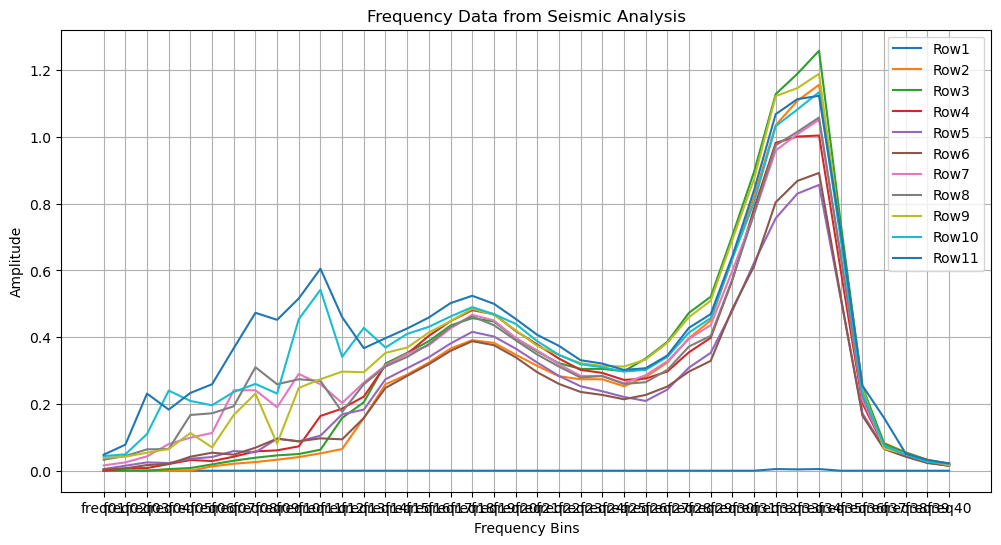

In [15]:
#plot the frequency data for the first few rows 
plt.figure(figsize=(12,6))
for index, row in data.iterrows():
    plt.plot(row.index[2:42],row[2:42],label=f'Row{index+1}')

plt.title('Frequency Data from Seismic Analysis')
plt.xlabel('Frequency Bins')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

###Explanation
##Data Loading- The seismic data is read as a string and then converted into a pandas DataFrame
##Analysis The mean frequency is calculated for each row which gives and average amplitude across the frequency bins
##Visualisation A plot is created to visualize the amplitude across frequency bins for each row